In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Gold Futures Historical Data.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,03/24/2025,"3,060.04","3,057.50","3,066.36","3,046.45",36.98K,0.09%
1,03/23/2025,"3,057.44","3,054.70","3,058.67","3,052.85",186.58K,0.30%
2,03/21/2025,"3,048.40","3,080.10","3,082.20","3,031.20",46.90K,-0.75%
3,03/20/2025,"3,071.30","3,085.60","3,092.80","3,060.30",28.81K,0.07%
4,03/19/2025,"3,069.10","3,069.30","3,089.40","3,059.20",19.96K,0.01%


In [3]:
df.dtypes

Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

##### Now we need to do these data manipulation stuff :
- Remove the colons in Price, Open, High, and Low columns
- remove the K from Vol.
- Remove the percentage from Change%
- Convert them all to numeric values
- Convert the Date column into datetime object

In [4]:
cols = df.columns.drop(['Date'])
df[cols] = df[cols].replace({',':'', 'K':'', '%':''}, regex= True)
df[cols] = df[cols].astype('float64')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,03/24/2025,3060.04,3057.5,3066.36,3046.45,36.98,0.09
1,03/23/2025,3057.44,3054.7,3058.67,3052.85,186.58,0.30
2,03/21/2025,3048.40,3080.1,3082.20,3031.20,46.90,-0.75
3,03/20/2025,3071.30,3085.6,3092.80,3060.30,28.81,0.07
4,03/19/2025,3069.10,3069.3,3089.40,3059.20,19.96,0.01


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', ascending= True)
df.reset_index(inplace= True, drop= True)

In [6]:
pd.DataFrame(df)

,Date,Price,Open,High,Low,Vol.,Change %
0,2025-03-24,3060.04,3057.5,3066.36,3046.45,36.98,0.09
1,2025-03-23,3057.44,3054.7,3058.67,3052.85,186.58,0.30
2,2025-03-21,3048.40,3080.1,3082.20,3031.20,46.90,-0.75
3,2025-03-20,3071.30,3085.6,3092.80,3060.30,28.81,0.07
4,2025-03-19,3069.10,3069.3,3089.40,3059.20,19.96,0.01
...,...,...,...,...,...,...,...
3876,2010-01-08,1138.90,1131.5,1140.00,1119.50,212.62,0.46
3877,2010-01-07,1133.70,1139.0,1139.50,1128.70,121.15,-0.25
3878,2010-01-06,1136.50,1118.5,1141.00,1116.80,176.90,1.59
3879,2010-01-05,1118.70,1122.0,1129.60,1115.50,156.41,0.04


In [7]:
df.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.               float64
Change %           float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3881 entries, 0 to 3880
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3881 non-null   datetime64[ns]
 1   Price     3881 non-null   float64       
 2   Open      3881 non-null   float64       
 3   High      3881 non-null   float64       
 4   Low       3881 non-null   float64       
 5   Vol.      3878 non-null   float64       
 6   Change %  3881 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 212.4 KB


In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        3
Change %    0
dtype: int64

In [11]:
df = df.rename(columns= {'Vol.':'Vol', 'Change %': 'Change_Perc'})

In [12]:
df.query('Vol.isna()')

,Date,Price,Open,High,Low,Vol,Change_Perc
182,2024-07-04,2364.6,2367.20,2371.05,2359.35,NaN,-0.20
193,2024-06-19,2343.0,2342.95,2349.65,2338.60,NaN,0.35
2957,2013-08-30,1396.1,1396.10,1396.10,1396.10,NaN,-1.19


### It's better to check correlation before dropping these two rows

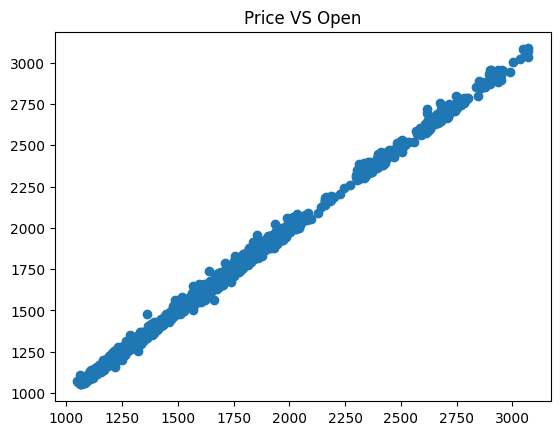

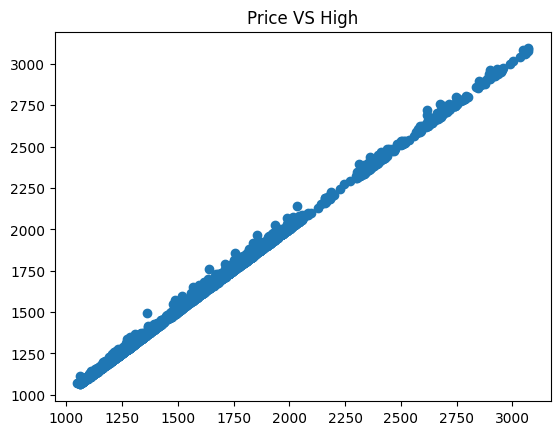

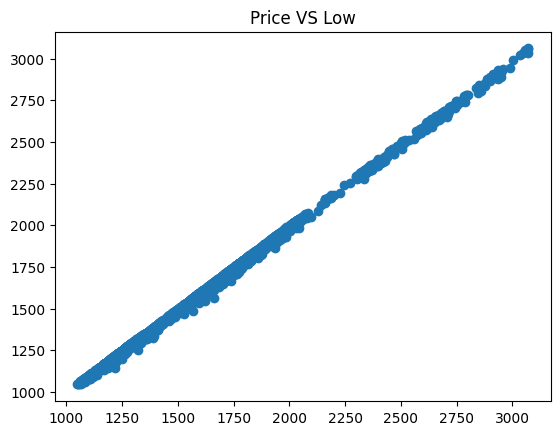

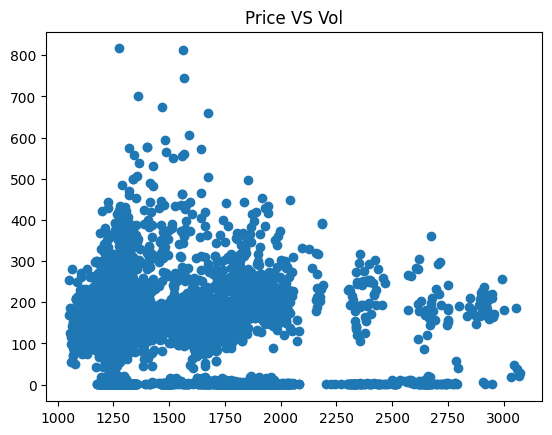

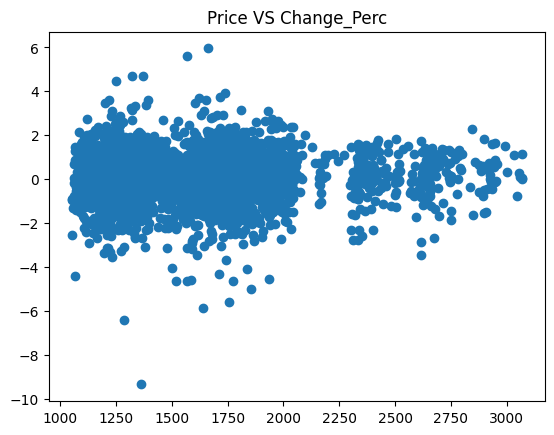

In [13]:
cols = df.columns.drop(['Date', 'Price'])
for i in cols:
    plt.scatter(df['Price'], df[i])
    plt.title(f'Price VS {i}')
    plt.show()
    

### It's obvious from these scatter plots that Price has almost no correlation with Change Precentage and Vol

In [14]:
# Check todya's price
df.query('Date == "2025-03-24"')

C:\Users\User\AppData\Local\Temp\ipykernel_9008\876907354.py:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df.query('Date == "2025-03-24"')


,Date,Price,Open,High,Low,Vol,Change_Perc
0,2025-03-24,3060.04,3057.5,3066.36,3046.45,36.98,0.09


In [15]:
def create_ts_features(df):

    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    
    return df

In [16]:
df_ = df.copy()
df_ = df_.set_index('Date')

In [17]:
df_.head()

,Price,Open,High,Low,Vol,Change_Perc
Date,,,,,,
2025-03-24,3060.04,3057.5,3066.36,3046.45,36.98,0.09
2025-03-23,3057.44,3054.7,3058.67,3052.85,186.58,0.30
2025-03-21,3048.40,3080.1,3082.20,3031.20,46.90,-0.75
2025-03-20,3071.30,3085.6,3092.80,3060.30,28.81,0.07
2025-03-19,3069.10,3069.3,3089.40,3059.20,19.96,0.01


In [18]:
df_ = create_ts_features(df_)
df_.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol', 'Change_Perc', 'dayofweek',
       'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')

In [19]:
ts_cols = ['dayofweek', 'quarter', 'month', 'year',
       'dayofyear', 'dayofmonth', 'weekofyear']

def time_distribution_box(df, target):
    fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(30, 60))

    sns.boxplot(data=df, x='dayofweek', y=target, ax=ax[0], palette='Blues')
    ax[0].set_title('Day Of Week')

    sns.boxplot(data=df, x='dayofmonth', y=target, ax=ax[1], palette='Blues')
    ax[1].set_title('Day Of Month')

    sns.boxplot(data=df, x='dayofyear', y=target, ax=ax[2], palette='Blues')
    ax[2].set_title('Day Of Year')

    sns.boxplot(data=df, x='weekofyear', y=target, ax=ax[3], palette='Blues')
    ax[3].set_title('Week Of Year')

    sns.boxplot(data=df, x='month', y=target, ax=ax[4], palette='Blues')
    ax[4].set_title('Month')

    sns.boxplot(data=df, x='quarter', y=target, ax=ax[5], palette='Blues')
    ax[5].set_title('Quarter')

    sns.boxplot(data=df, x='year', y=target, ax=ax[6], palette='Blues')
    ax[6].set_title('Year')

    plt.tight_layout()
    plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_9008\2214164146.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='dayofweek', y=target, ax=ax[0], palette='Blues')
C:\Users\User\AppData\Local\Temp\ipykernel_9008\2214164146.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='dayofmonth', y=target, ax=ax[1], palette='Blues')
C:\Users\User\AppData\Local\Temp\ipykernel_9008\2214164146.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='dayofyear', y=target, ax=ax[2], palette='Blues')
C:\Users\User\AppData\Local\

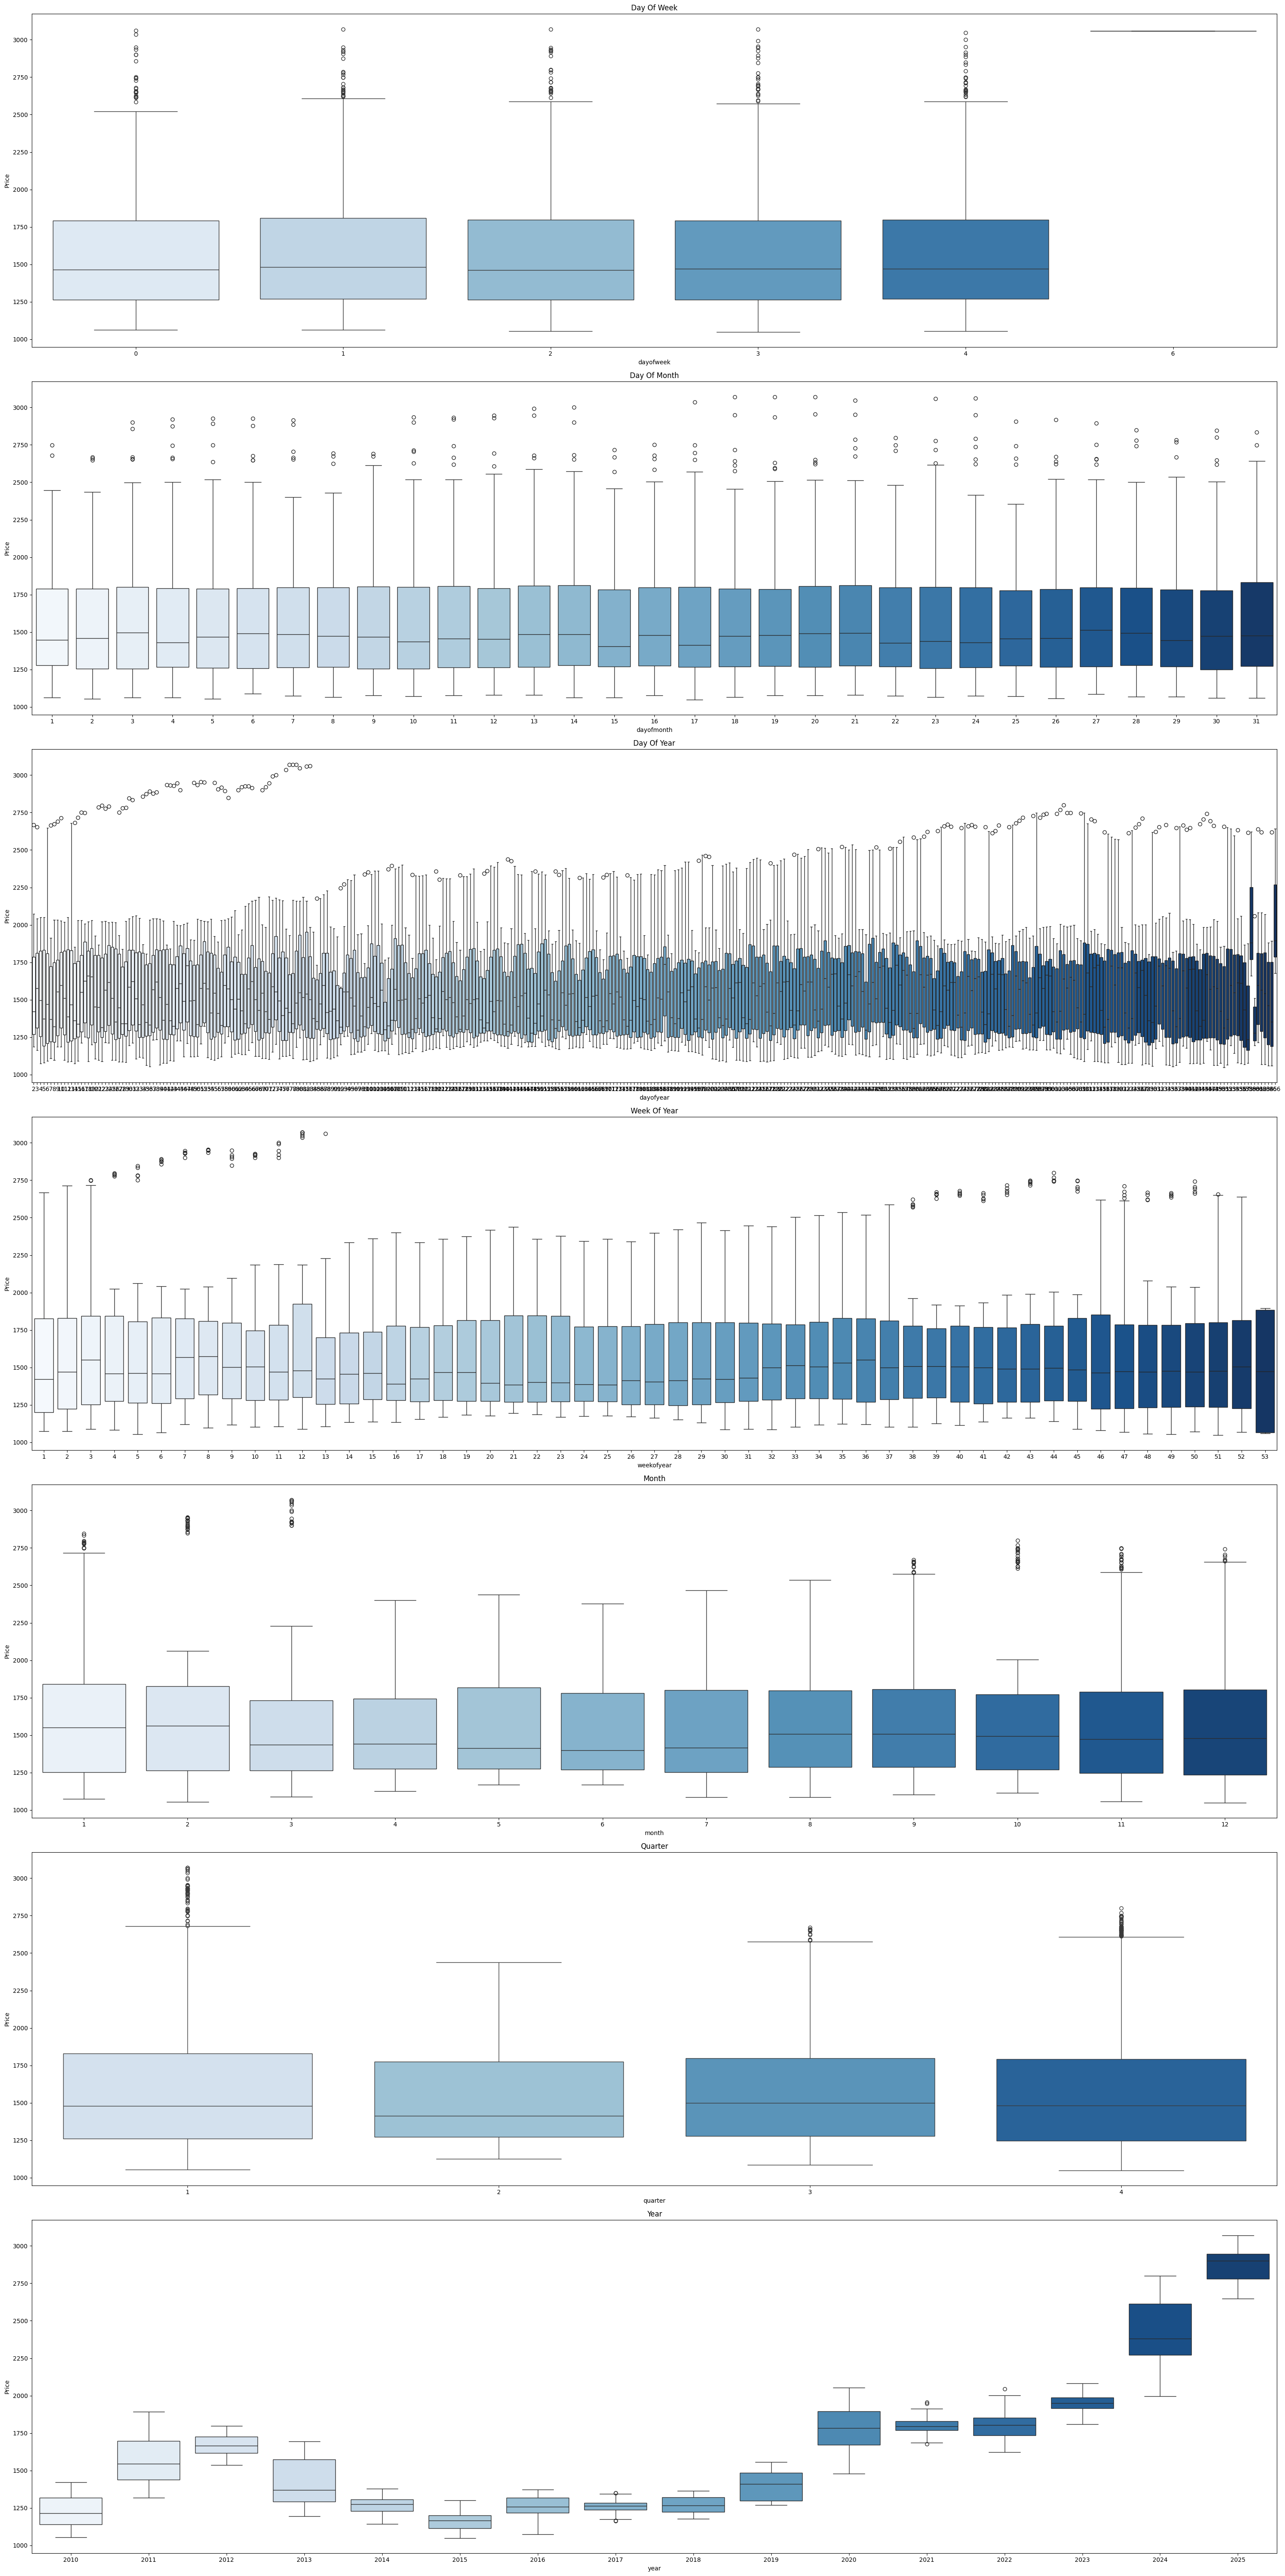

In [20]:
time_distribution_box(df_, 'Price')

#### From these box plots we can deduce that most of the outliers are above the upper limit and are all in the first and last quarters of the year, specifically in February and March

In [21]:
df_.describe()

,Price,Open,High,Low,Vol,Change_Perc,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
count,3881.000000,3881.000000,3881.000000,3881.000000,3878.000000,3881.000000,3881.000000,3881.000000,3881.000000,3881.000000,3881.000000,3881.000000,3881.0
mean,1567.809709,1567.885738,1578.900343,1556.268397,136.653210,0.031458,2.001804,2.490595,6.471528,2017.158207,181.568153,15.723783,26.300696
std,384.455645,384.217982,387.180286,381.352252,112.055706,0.998474,1.412662,1.121016,3.448483,4.392908,105.334406,8.752789,15.039125
min,1049.600000,1051.500000,1062.700000,1044.500000,0.120000,-9.340000,0.000000,1.000000,1.000000,2010.000000,2.000000,1.000000,1.0
25%,1264.800000,1265.200000,1273.200000,1256.900000,4.755000,-0.440000,1.000000,1.000000,3.000000,2013.000000,89.000000,8.000000,13.0
50%,1469.800000,1470.000000,1478.000000,1460.500000,141.505000,0.030000,2.000000,2.000000,6.000000,2017.000000,181.000000,16.000000,26.0
75%,1797.800000,1798.100000,1810.800000,1785.000000,202.767500,0.570000,3.000000,3.000000,9.000000,2021.000000,273.000000,23.000000,39.0
max,3071.300000,3085.600000,3092.800000,3060.300000,816.530000,5.950000,6.000000,4.000000,12.000000,2025.000000,366.000000,31.000000,53.0


#### There is a slight difference between the mean and the 50% percentile, which indicates a slight skewness with some outliers as previously shown in the boxplots 

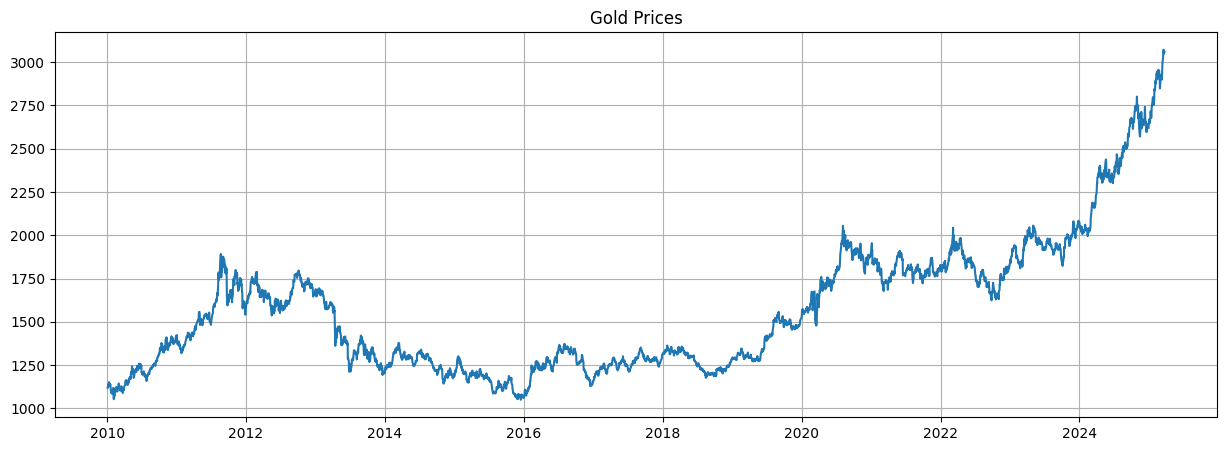

In [22]:
plt.figure(figsize= (15, 5))
plt.plot(df['Date'], df['Price'])
plt.title('Gold Prices')
plt.grid()
plt.show()

#### There is an unprecedented spike in gold prices in 2025 with very high rate of increase, but the general trend is an inncreasing one with fluctuations due to seasonality

#### Descriptive Questions

- What is the overall price range of the asset from January 2010 to March 2025?
    - This examines the minimum and maximum prices to understand the asset's growth or decline over time.
- How many trading days are included in the dataset, and are there any significant gaps (e.g., missing weeks or months)?
    - This checks the completeness of the data and identifies potential holidays or anomalies.
- What is the average daily trading volume across the entire period, and how does it vary year by year?
    - This provides insight into market activity and its evolution.
- What are the top 5 days with the highest percentage price increases and decreases?
    - This highlights extreme market movements for further investigation.
- How frequently does the daily "Change %" exceed ±2%?
    - This measures the occurrence of significant volatility.

### Q_01
- What is the overall price range of the asset from January 2010 to March 2025?

In [23]:
print(df_['Price'].max())
print(df_['Price'].min())

3071.3
1049.6


In [24]:
df_.query('Price == 3071.3')

,Price,Open,High,Low,Vol,Change_Perc,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,,,,
2025-03-20,3071.3,3085.6,3092.8,3060.3,28.81,0.07,3,1,3,2025,79,20,12


In [25]:
df_.query('Price == 1049.6')

,Price,Open,High,Low,Vol,Change_Perc,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,,,,
2015-12-17,1049.6,1072.2,1072.7,1046.8,168.67,-2.53,3,4,12,2015,351,17,51


### Q_02
- How many trading days are included in the dataset, and are there any significant gaps (e.g., missing weeks or months)?


In [26]:
x_01 = []
y_01 = []
for i in df_['year'].unique():
    trade_days = df_.query(f'year == {i}')['year'].count().sum()
    print(i, trade_days)
    if i == 2025:
        continue
    else:
        x_01.append(i)
        y_01.append(trade_days)

2025 57
2024 257
2023 257
2022 258
2021 258
2020 259
2019 258
2018 258
2017 255
2016 252
2015 252
2014 252
2013 252
2012 252
2011 252
2010 252


Text(0.5, 1.0, 'Number of Trading Days for Each Year')

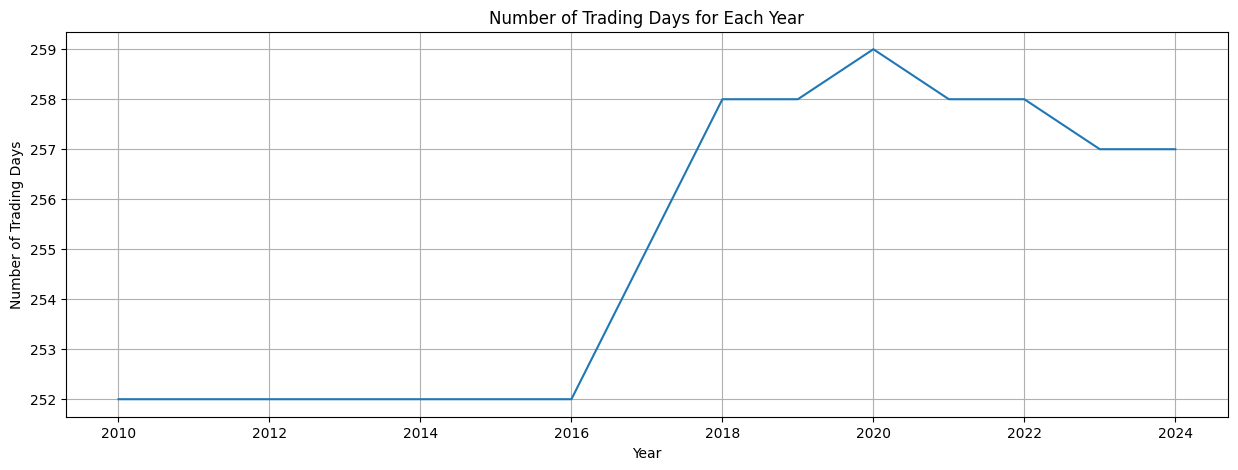

In [27]:
plt.figure(figsize= (15, 5))
plt.plot(x_01, y_01)
plt.xlabel('Year')
plt.ylabel('Number of Trading Days')
plt.grid()
plt.title('Number of Trading Days for Each Year')

### Q_03

- What is the average daily trading volume across the entire period, and how does it vary year by year?

In [28]:
# for the entire period
df_['Vol'].mean()

136.65321041774112

In [29]:
# for each year
x_02 = []
y_02 = []

for i in df_['year'].unique():
    avg_vol = df_.query(f'year == {i}')['Vol'].mean()
    print(i, avg_vol)

    x_02.append(i)
    y_02.append(avg_vol)

2025 140.48859649122807
2024 94.55839215686274
2023 94.8363813229572
2022 91.1079457364341
2021 101.47023255813954
2020 131.4326254826255
2019 132.32844961240312
2018 133.7670542635659
2017 162.9755294117647
2016 197.43301587301588
2015 143.28757936507938
2014 139.22130952380954
2013 163.17131474103584
2012 149.36777777777775
2011 168.50948412698412
2010 148.82503968253965


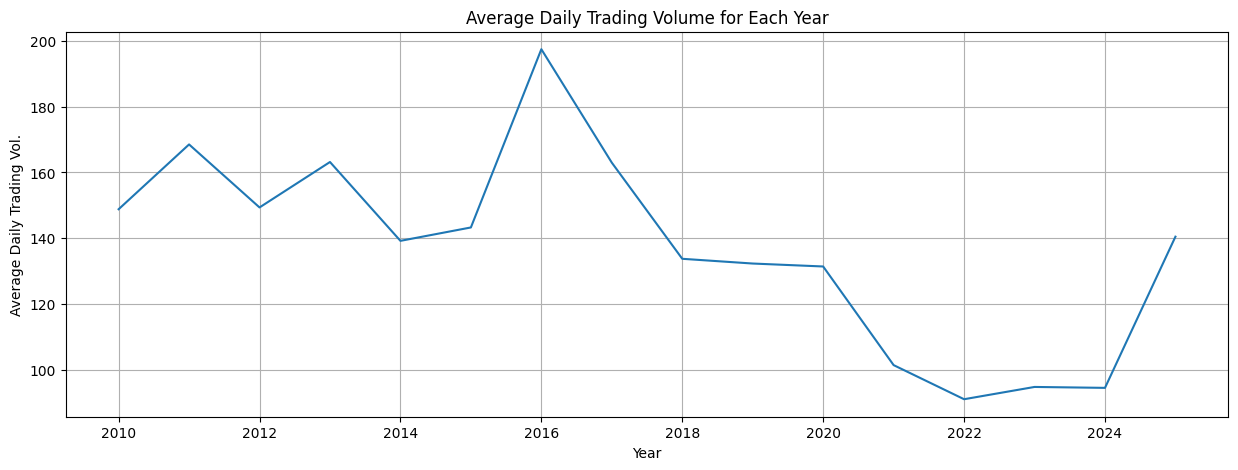

In [30]:
plt.figure(figsize= (15, 5))
plt.plot(x_02, y_02)
plt.xlabel('Year')
plt.ylabel('Average Daily Trading Vol.')
plt.title('Average Daily Trading Volume for Each Year')
plt.grid()
plt.show()

### Q_04
- What are the top 5 days with the highest percentage price increases and decreases?

In [31]:
df_.sort_values('Change_Perc', ascending=False).head(5)

,Price,Open,High,Low,Vol,Change_Perc,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,,,,
2020-03-24,1660.8,1563.8,1698.0,1560.5,418.78,5.95,1,1,3,2020,84,24,13
2020-03-23,1567.6,1505.0,1569.3,1484.6,362.07,5.59,0,1,3,2020,83,23,13
2013-09-19,1369.3,1365.0,1375.4,1358.5,180.03,4.72,3,3,9,2013,262,19,38
2016-06-24,1322.4,1254.3,1362.6,1252.8,574.24,4.69,4,2,6,2016,176,24,25
2016-02-11,1247.8,1197.5,1263.9,1196.3,365.65,4.45,3,1,2,2016,42,11,6


In [32]:
df_.sort_values('Change_Perc', ascending=True).head(5)

,Price,Open,High,Low,Vol,Change_Perc,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,,,,
2013-04-15,1361.1,1481.0,1495.0,1335.1,700.34,-9.34,0,2,4,2013,105,15,16
2013-06-20,1286.2,1351.2,1351.2,1275.4,368.87,-6.39,3,2,6,2013,171,20,25
2011-09-23,1639.8,1739.0,1757.9,1631.7,359.50,-5.85,4,3,9,2011,266,23,38
2011-08-24,1757.3,1831.5,1856.8,1751.6,440.83,-5.59,2,3,8,2011,236,24,34
2020-11-09,1854.4,1956.0,1966.1,1848.0,496.09,-4.99,0,4,11,2020,314,9,46


### Q_05
- How frequently does the daily "Change %" exceed ±2%?

In [33]:
freq = df_.query('Change_Perc < -2 or Change_Perc > 2')['Change_Perc'].count()
days = df_['Change_Perc'].count()
print(f"The daily Change Percentage exceeded -+2 for: {freq} times out of {days} days")

The daily Change Percentage exceeded -+2 for: 194 times out of 3881 days


### Q_06
- What is the correlation between daily trading volume and the absolute value of "Change %"?
    - This investigates whether larger price movements are associated with higher trading activity.

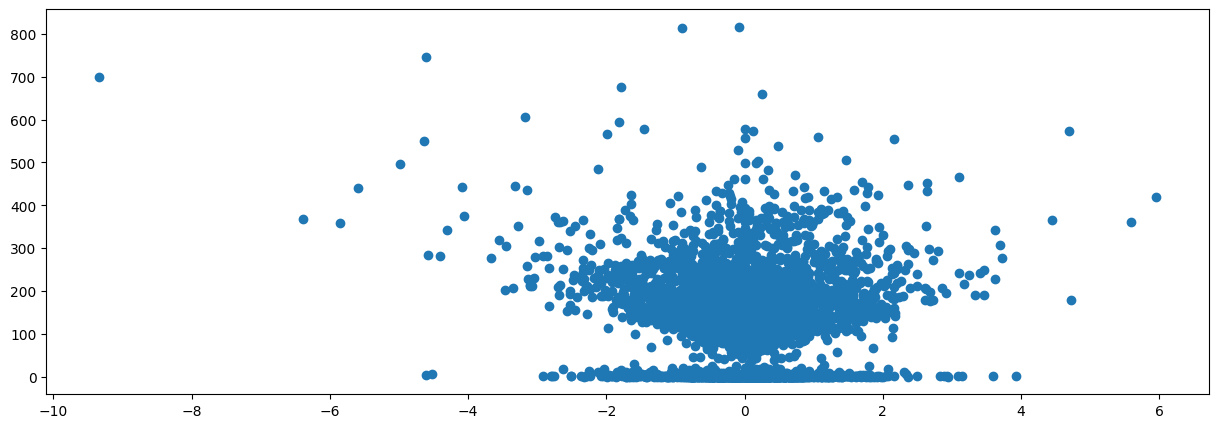

In [34]:
plt.figure(figsize= (15, 5))
plt.scatter(df_['Change_Perc'], df_['Vol'])
plt.show()

In [35]:
correlation = df_['Vol'].corr(df_['Change_Perc'])
print("Pearson correlation coefficient:", correlation)

Pearson correlation coefficient: -0.05231605886589234


In [36]:
# There is almost no relationship between these two 

#### Q_07
- Is there a noticeable trend in the price over the 15-year period (e.g., upward, downward, or cyclical)?
    - This explores the long-term behavior of the asset.

In [37]:
df_.head()

,Price,Open,High,Low,Vol,Change_Perc,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,,,,
2025-03-24,3060.04,3057.5,3066.36,3046.45,36.98,0.09,0,1,3,2025,83,24,13
2025-03-23,3057.44,3054.7,3058.67,3052.85,186.58,0.30,6,1,3,2025,82,23,12
2025-03-21,3048.40,3080.1,3082.20,3031.20,46.90,-0.75,4,1,3,2025,80,21,12
2025-03-20,3071.30,3085.6,3092.80,3060.30,28.81,0.07,3,1,3,2025,79,20,12
2025-03-19,3069.10,3069.3,3089.40,3059.20,19.96,0.01,2,1,3,2025,78,19,12


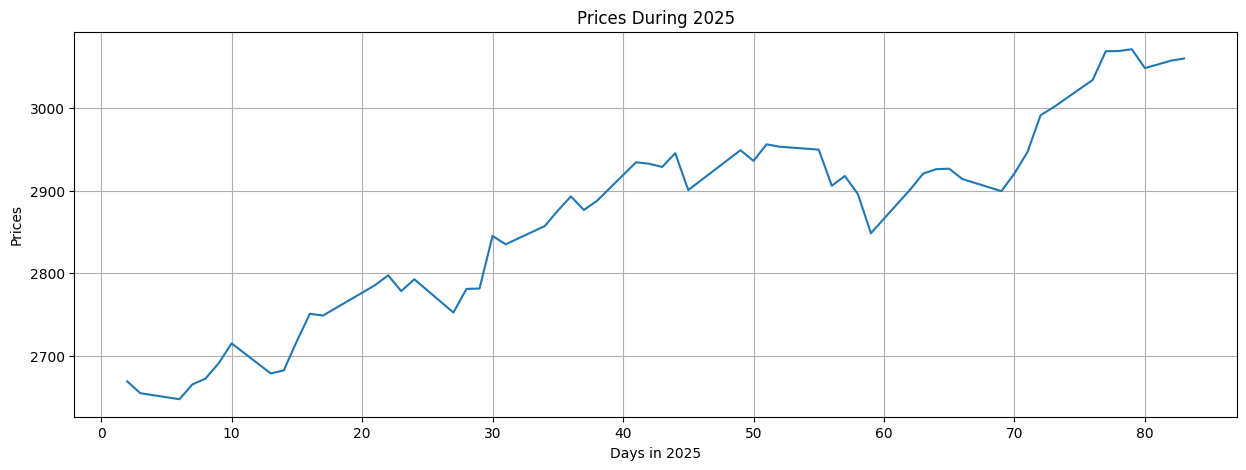

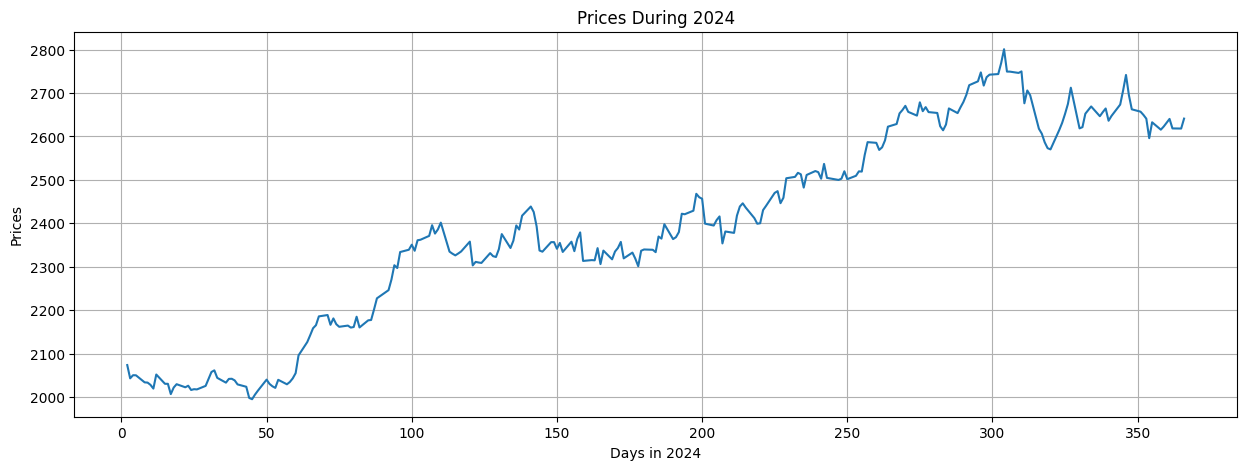

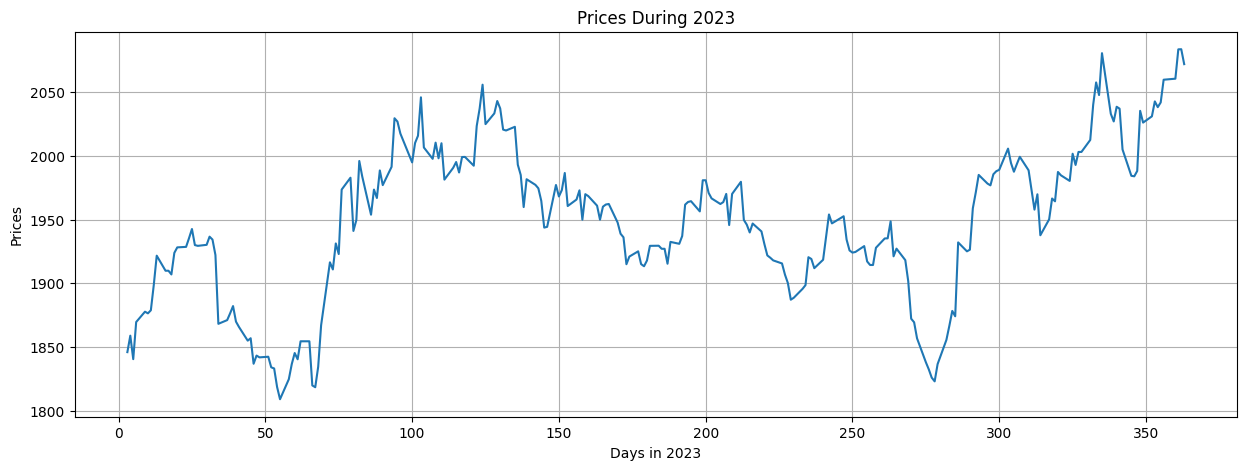

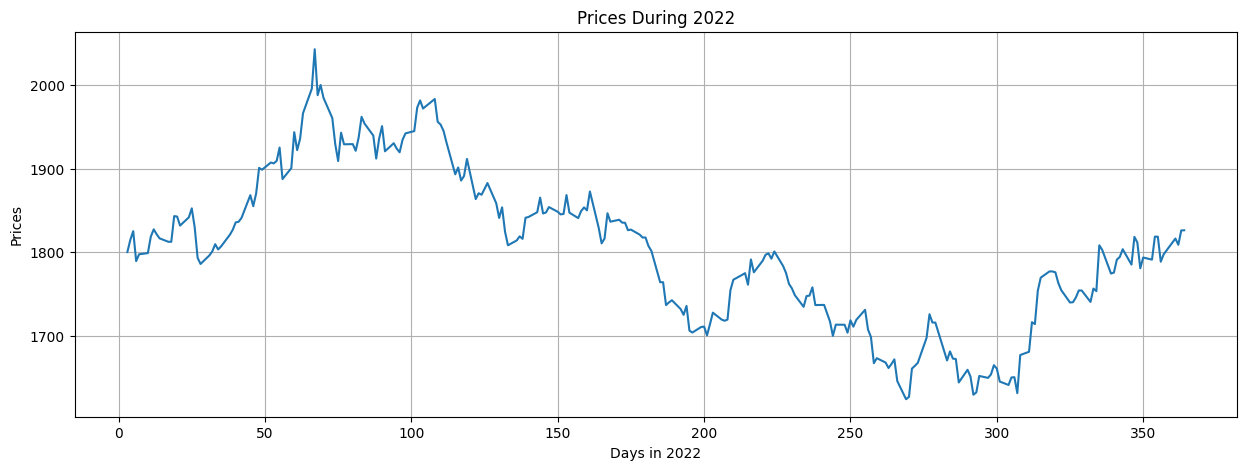

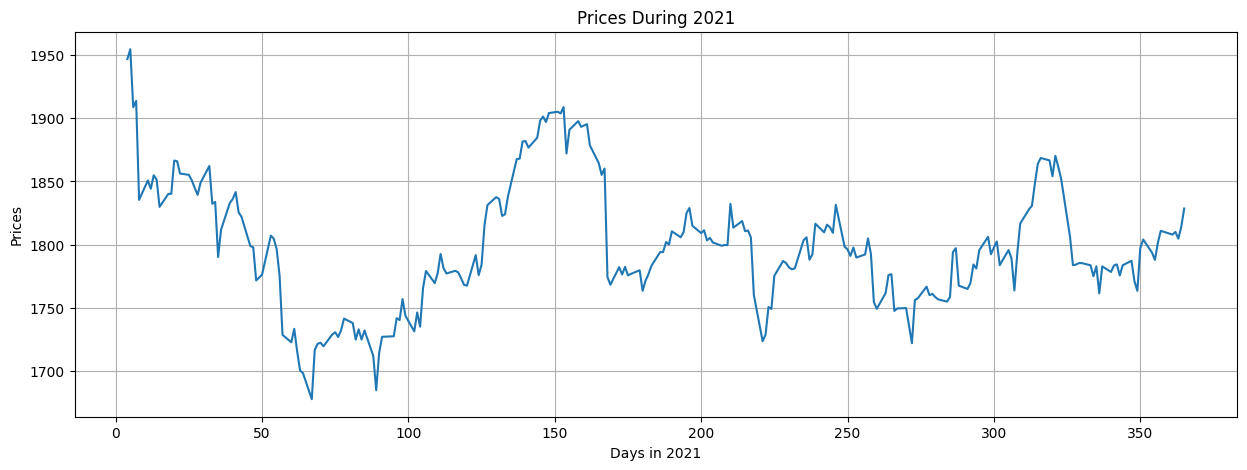

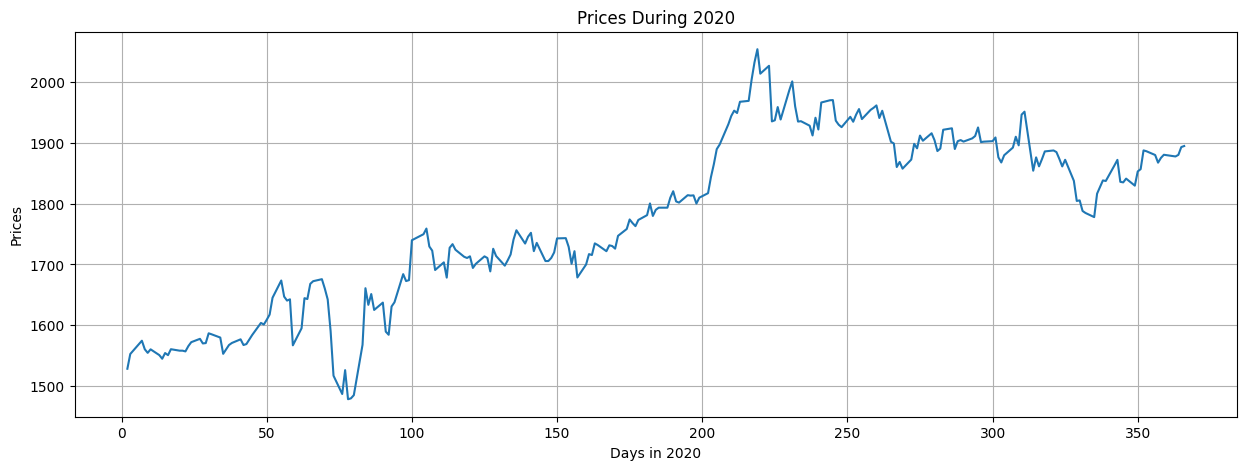

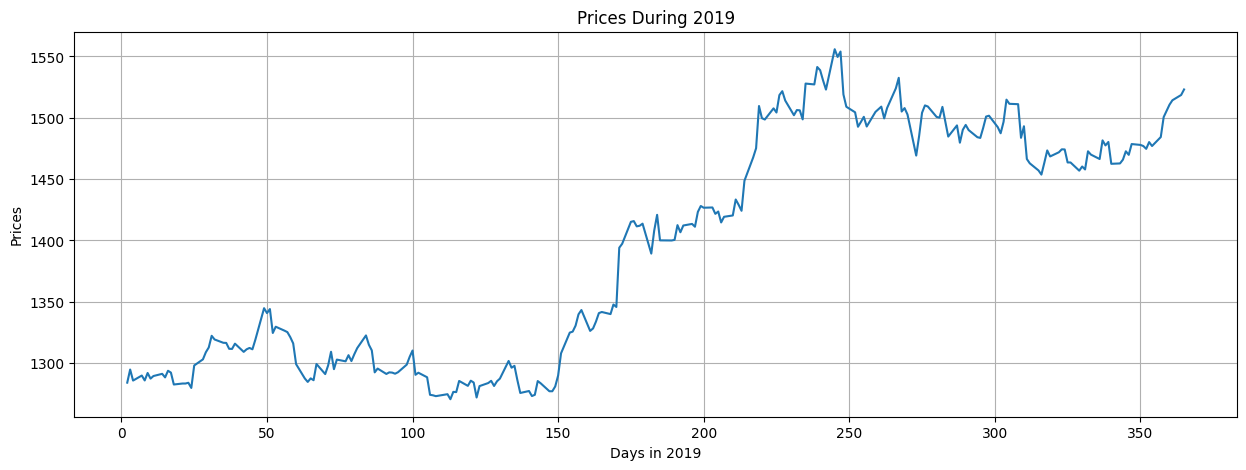

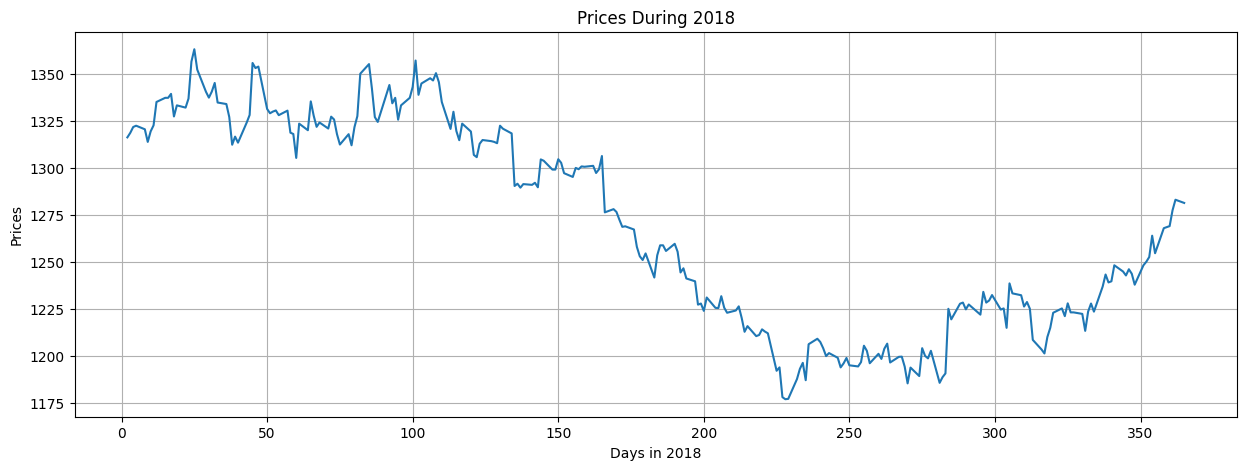

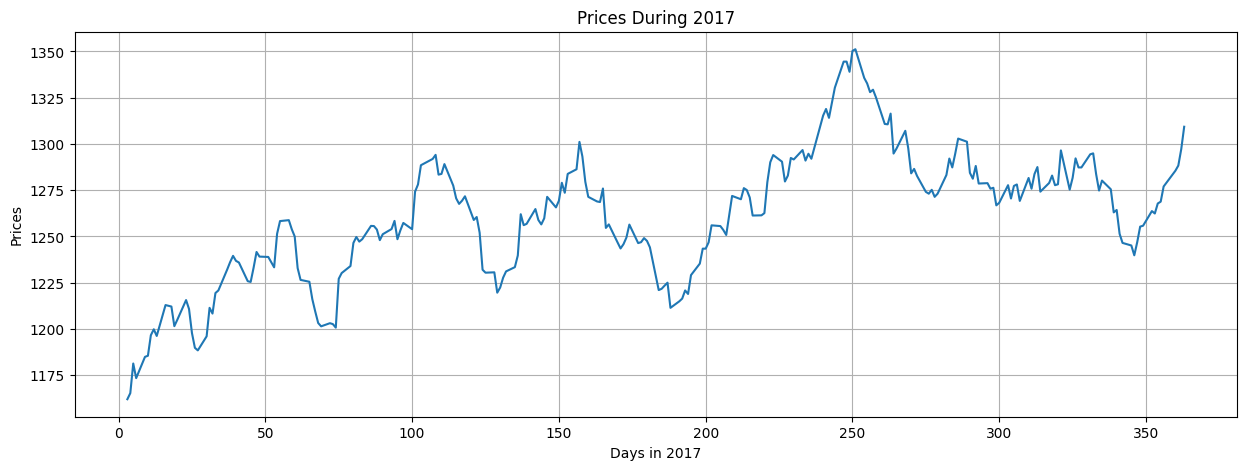

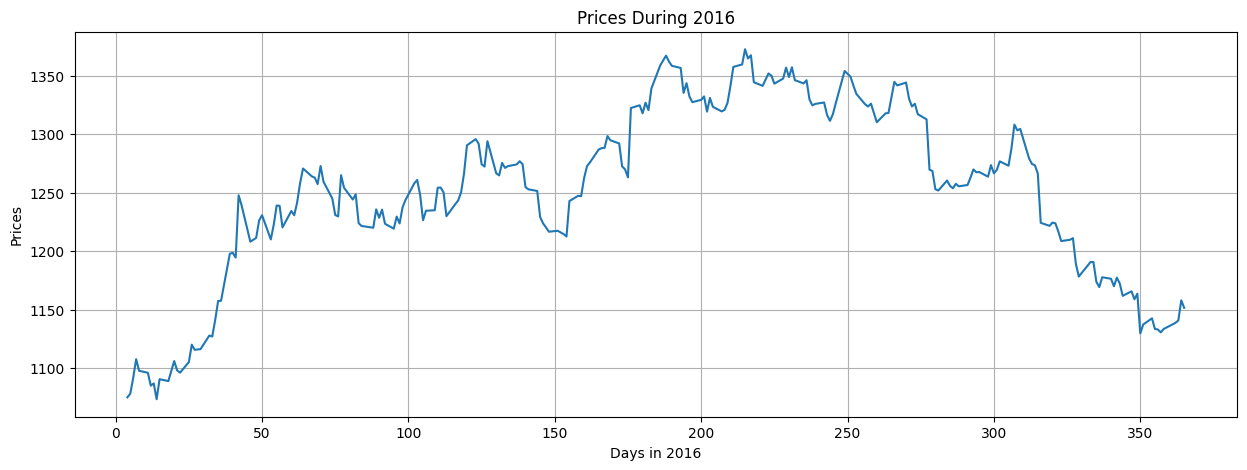

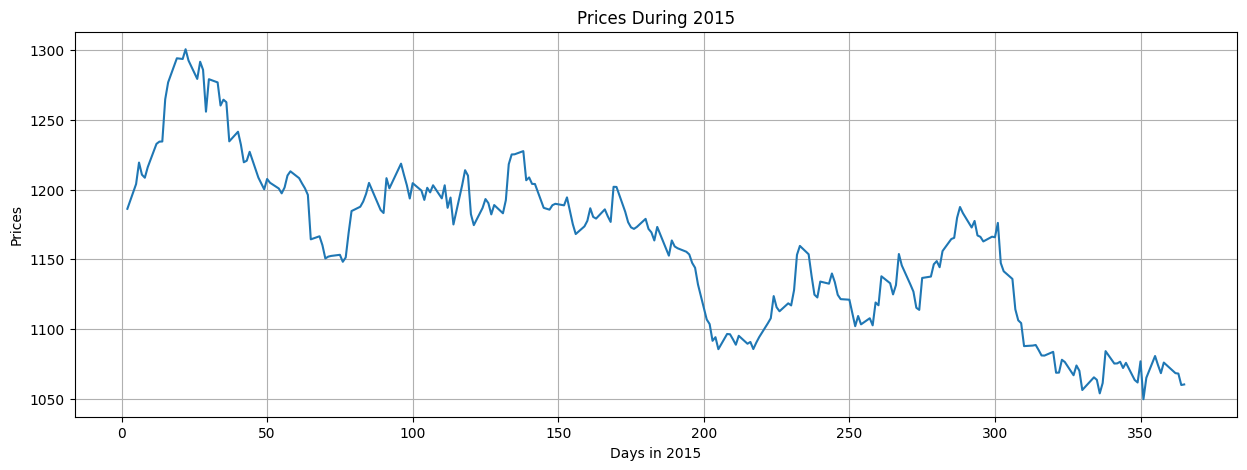

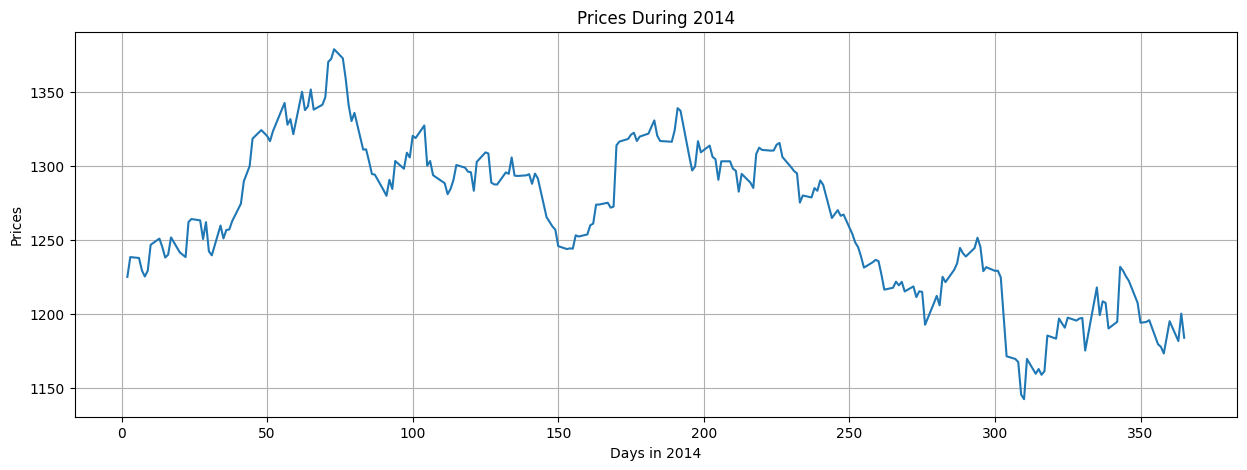

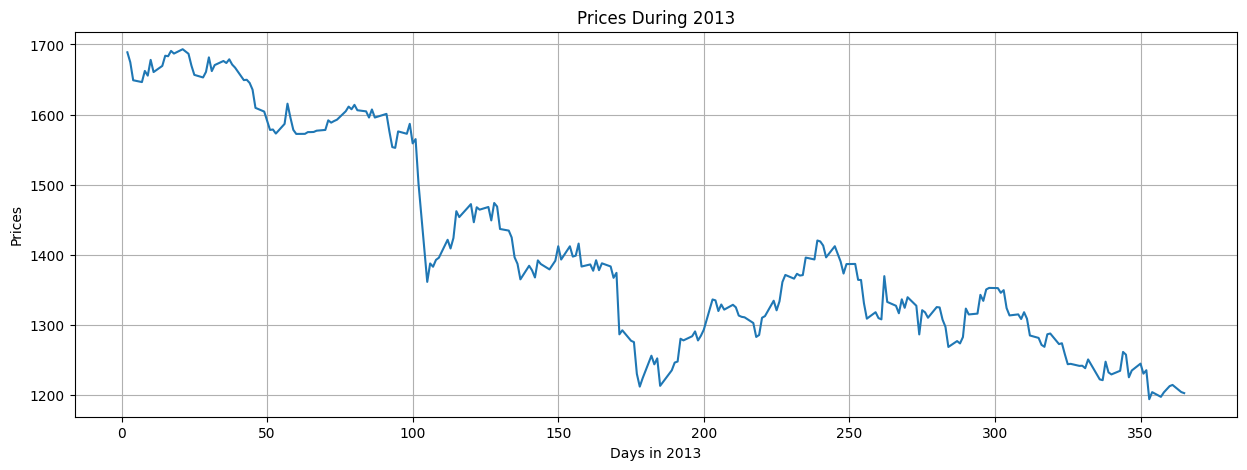

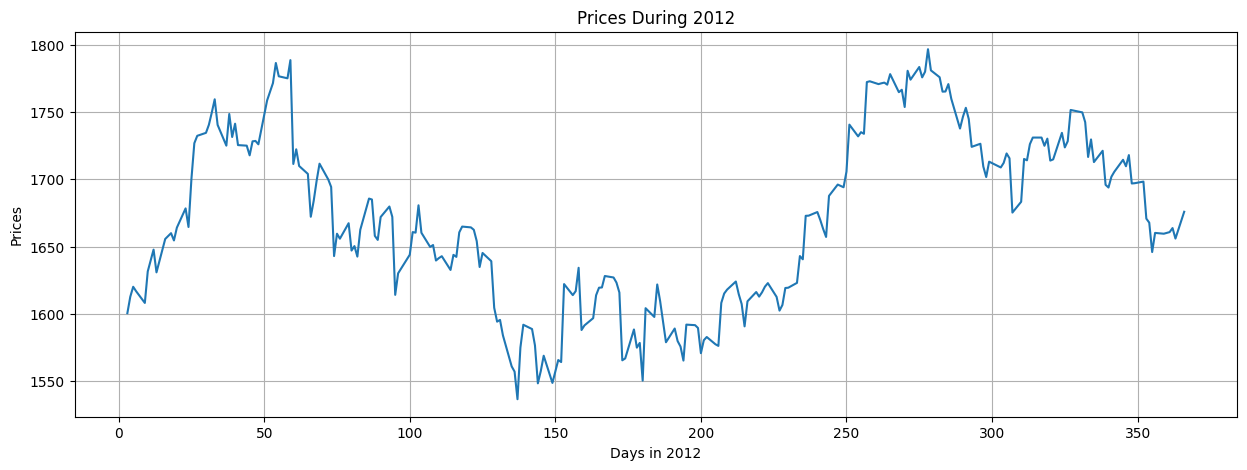

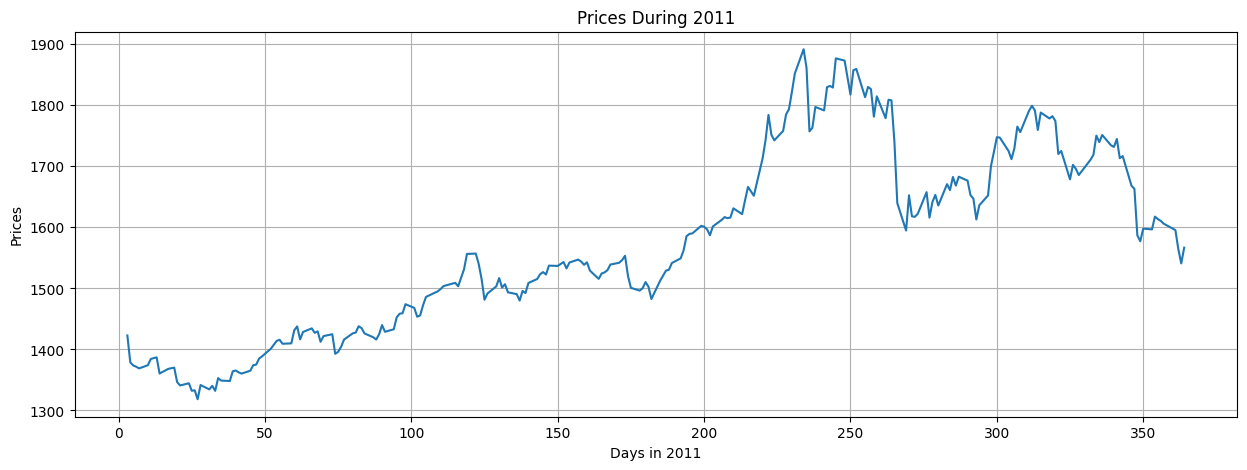

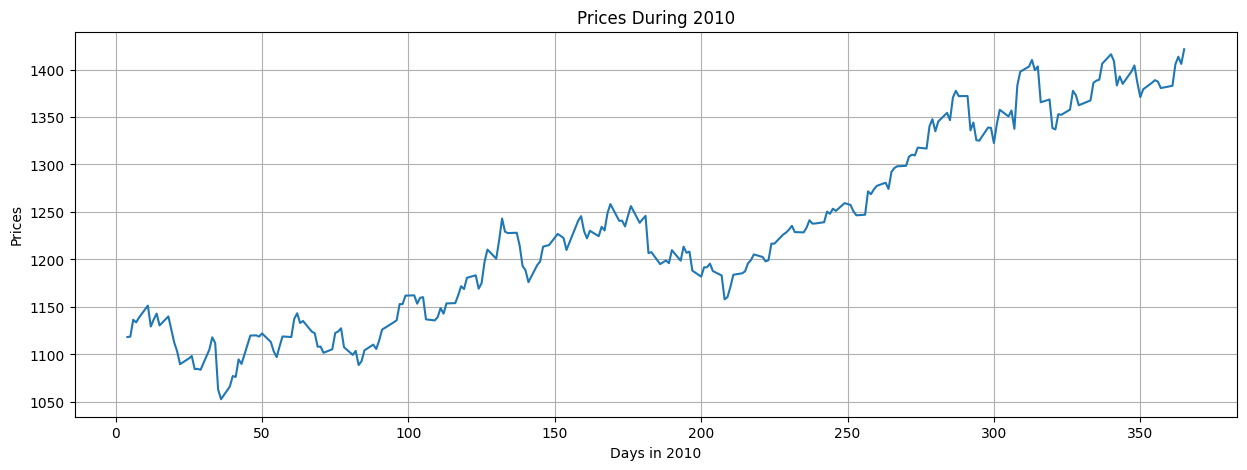

In [38]:
# we will draw the trend through each year and the whole trend has been already plotted

for i in df_['year'].unique():
    trend = df_.query(f"year == {i}")
    plt.figure(figsize= (15, 5))
    plt.plot(trend['dayofyear'], trend['Price'])
    plt.xlabel(f"Days in {i}")
    plt.ylabel(f"Prices")
    plt.title(f"Prices During {i}")
    plt.grid()
    plt.show()

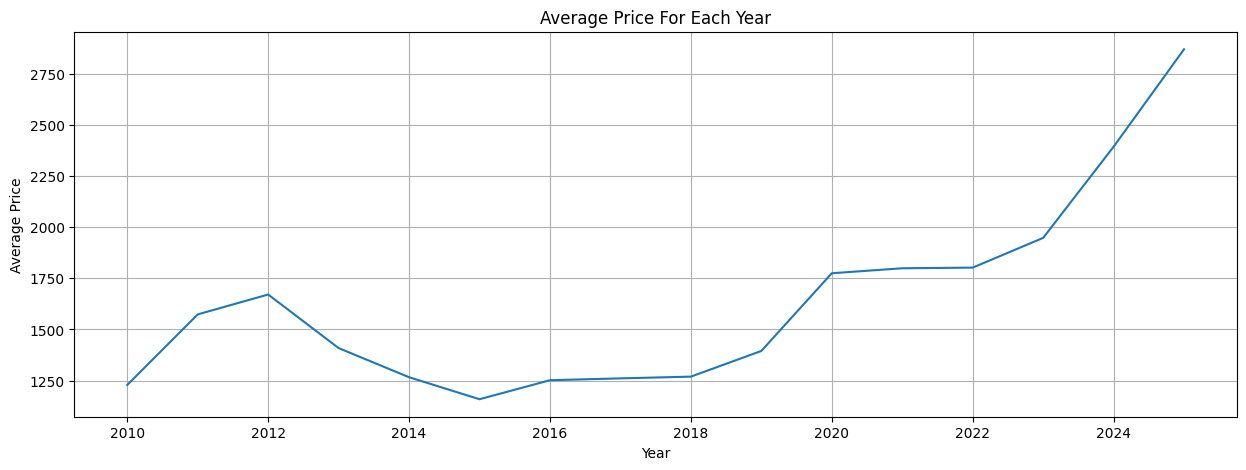

In [39]:
# Let us see the average prices through these years
avg_price = []
for i in df_['year'].unique():
    avg_trend = df_.query(f'year == {i}')['Price'].mean()
    avg_price.append(avg_trend)

plt.figure(figsize= (15, 5))
plt.plot(df_['year'].unique(), avg_price)
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price For Each Year')
plt.grid()
plt.show()


In [ ]:
# As the plot states:
# The trend was increasing between 2010 and 2012 from 1250 to around 1700
# Then it went down between 2012 and 2015 from 1700 to 1200
# Then it almost stayed stable around 1250 from 2015 till 2018
# After that, a high incline has occured between 2018 and 2020 to get above 1750 for the first time
# Then it stayed around that value till 2022
# After that, a small increase made it below 2000 between 2022 and 2023
# Finally, a dramatic increase after 2023 and yet it keeps increasing till it almost reached 3000

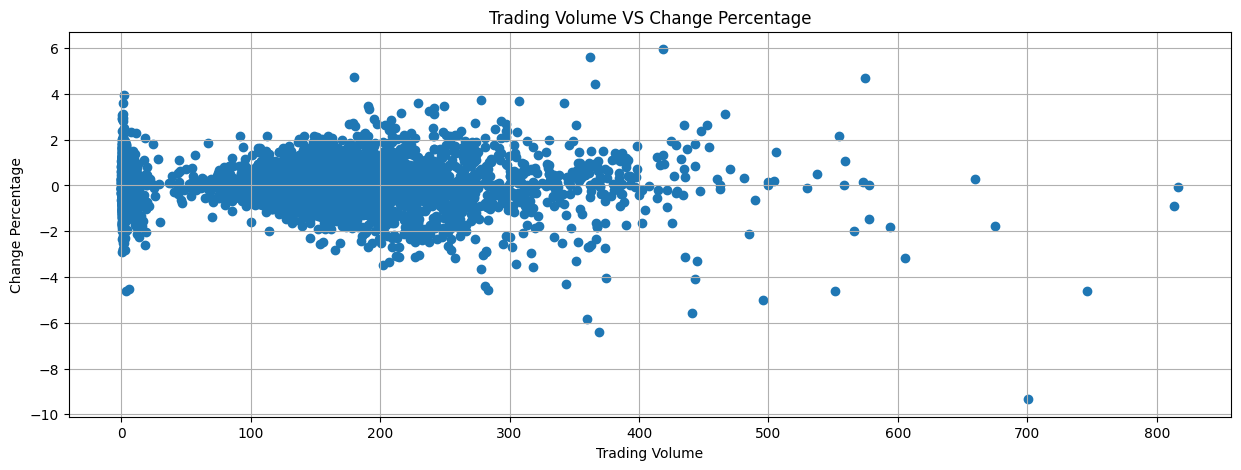

In [42]:
# Q_08: What is the correlation between daily trading volume and the absolute value of change?

plt.figure(figsize= (15, 5))
plt.scatter(df_['Vol'], df_['Change_Perc'])
plt.xlabel('Trading Volume')
plt.ylabel('Change Percentage')
plt.title('Trading Volume VS Change Percentage')
plt.grid()
plt.show()

In [43]:
# Very low signal of correlation between the two of them

In [44]:
# Q_09: check the seasonality in Change_Percentage

df_.head()

,Price,Open,High,Low,Vol,Change_Perc,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,,,,
2025-03-24,3060.04,3057.5,3066.36,3046.45,36.98,0.09,0,1,3,2025,83,24,13
2025-03-23,3057.44,3054.7,3058.67,3052.85,186.58,0.30,6,1,3,2025,82,23,12
2025-03-21,3048.40,3080.1,3082.20,3031.20,46.90,-0.75,4,1,3,2025,80,21,12
2025-03-20,3071.30,3085.6,3092.80,3060.30,28.81,0.07,3,1,3,2025,79,20,12
2025-03-19,3069.10,3069.3,3089.40,3059.20,19.96,0.01,2,1,3,2025,78,19,12


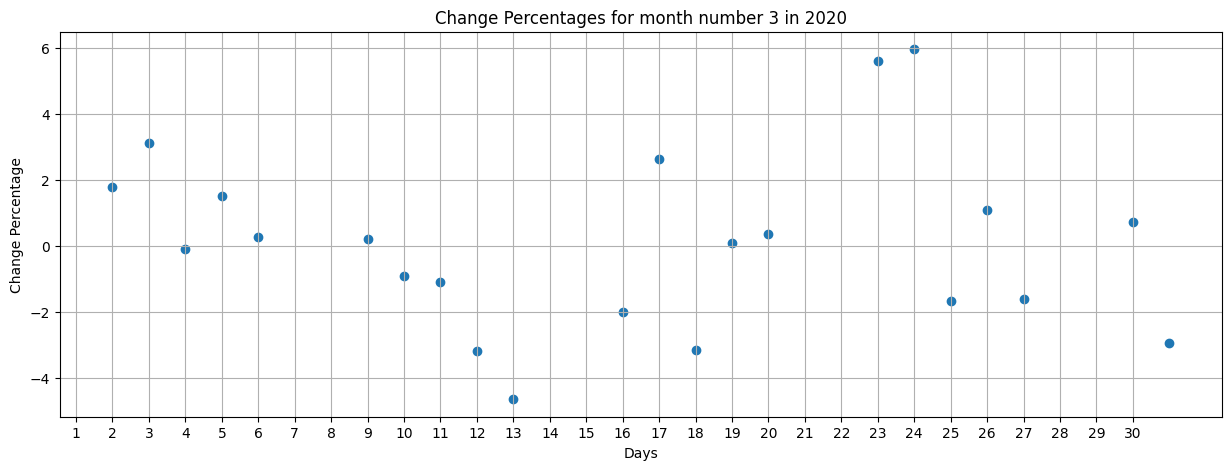

In [72]:
mont = 3
yr = 2020
plt.figure(figsize= (15, 5))
plt.scatter(df_.query(f'year == {yr} & month == {mont}')['dayofmonth'], df_.query(f'year == {yr} & month == {mont}')['Change_Perc'])
plt.xticks(ticks=range(1, 31), labels=[str(i) for i in range(1, 31)])
plt.xlabel('Days')
plt.ylabel('Change Percentage')
plt.title(f"Change Percentages for month number {mont} in {yr}")
plt.grid()
plt.show()